In [10]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key
import pprint as pprint
import gzip
from datetime import datetime
from scipy.stats import linregress

In [11]:
#Opening a file with list of countries provided by openweathermap.org
url ="http://bulk.openweathermap.org/sample/city.list.json.gz"
response = requests.get(url)
print(response.status_code)
with open('test.gzip', 'wb') as f:
    f.write(response.content)
with gzip.open("test.gzip", "rb") as f:
    file_content = f.read()
    json_content = json.loads(file_content.decode("utf-8"))
    df = pd.DataFrame.from_dict(json_content)
df.head(10)

200


NameError: name 'json' is not defined

In [255]:
#Taking a random sample of 500 cities from that list and using random_state to keep that list
df2 =df.sample(n = 500, random_state = 500) 
df2.head(10)

,id,name,state,country,coord
198382,7407361,Shiyuan,,CN,"{'lon': 102.807259, 'lat': 35.75275}"
54513,2231320,Garoua,,CM,"{'lon': 13.4, 'lat': 9.3}"
128164,3386329,Tiradentes,,BR,"{'lon': -39.283329, 'lat': -7.23333}"
43608,1816693,Beihuaidian,,CN,"{'lon': 117.558327, 'lat': 39.25528}"
1133,154915,Maneromango,,TZ,"{'lon': 38.784779, 'lat': -7.1988}"
58893,2517574,Fuente-Álamo de Murcia,,ES,"{'lon': -1.1, 'lat': 37.700001}"
64351,2647464,Harlington,,GB,"{'lon': -0.49241, 'lat': 51.962879}"
179302,6459770,Benkovski,,BG,"{'lon': 27.76667, 'lat': 43.091671}"
87391,2906200,Herborn,,DE,"{'lon': 7.3, 'lat': 49.76667}"
169506,6360038,Frómista,,ES,"{'lon': -4.41104, 'lat': 42.269798}"


In [229]:
 # Building query URL 
url2 = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url2 = f"{url2}appid=fa2ee2438b50a2cefcbc3ebbd3529d11&units={units}&q="

In [230]:
#Using cities names obtained earlier to get needed values
cities2 = list(df2["name"])

lat = []
lon = []
temp = []
hum =[]
cloud = []
wind = []
Country = []
# Looping through with a try and except claus to get the data needed for each city
for city in cities2:
    try:
        response = requests.get(query_url2 + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])  
        cloud.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
    except (KeyError, IndexError):
        print("error")


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


In [231]:
#constructing a new dataframe for the values obtained ... Will be saved in a CSV later
newdf = pd.DataFrame(list(zip(cities2, lat,lon,temp,hum,cloud,wind,Country)), 
               columns =['City', 'Latitude', 'Longitude','Temperature', 'Humidity','Cloudiness','Windiness','Country']) 
newdf.head(12)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windiness,Country
0,Shiyuan,35.75,102.81,26.83,58,25,5.95,CN
1,Garoua,9.30,13.40,67.87,14,100,2.35,CM
2,Tiradentes,-21.11,-44.18,63.75,94,41,8.86,BR
3,Beihuaidian,39.26,117.56,44.60,26,0,4.47,CN
4,Maneromango,-7.20,38.78,78.80,94,40,1.68,TZ
5,Fuente-Álamo de Murcia,51.96,-0.49,42.46,80,40,19.46,GB
6,Harlington,43.12,27.78,40.33,86,0,2.73,BG
7,Benkovski,50.68,8.32,40.06,75,42,1.01,DE
8,Herborn,42.27,-4.41,45.54,87,90,17.22,ES
9,Frómista,42.88,24.72,43.45,93,5,4.70,BG


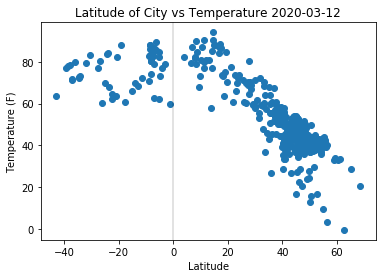

In [232]:
date_of_analysis = datetime.date(datetime.now())
x_values = newdf['Latitude']
y_values = newdf['Temperature']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f"Latitude of City vs Temperature {date_of_analysis}")
plt.axvline(0, color = 'black', alpha = .15)
plt.savefig("./PNG_images/lat_vs_temp.png")
plt.show()
# Scatter plot for latitude vs max temperature.

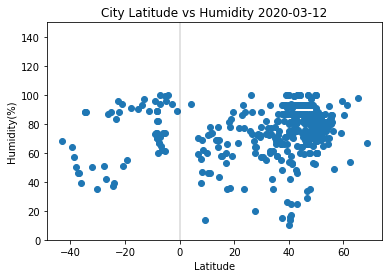

In [234]:
x_values = newdf['Latitude']
y_values = newdf['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'City Latitude vs Humidity {date_of_analysis}')
plt.ylim(0, 150)
plt.axvline(0, color = 'black', alpha = .15)
plt.savefig("./PNG_images/lat_vs_hum.png")
plt.show()
# Scatter plot for latitude vs humidity.

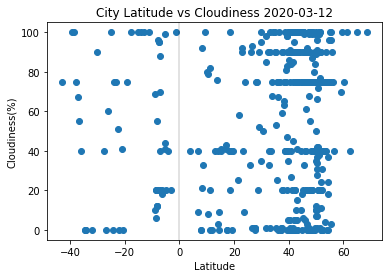

In [235]:
x_values = newdf['Latitude']
y_values = newdf['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'City Latitude vs Cloudiness {date_of_analysis}')
plt.axvline(0, color = 'black', alpha = .15)
plt.savefig("./PNG_images/lat_vs_Cloud.png")
plt.show()
# Scatter plot for latitude vs cloudiness.

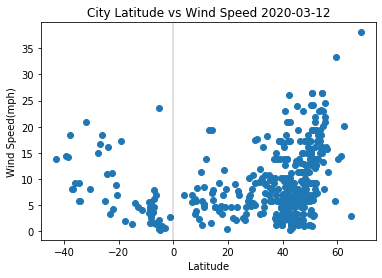

In [236]:
x_values = newdf['Latitude']
y_values = newdf['Windiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title(f'City Latitude vs Wind Speed {date_of_analysis}')
plt.axvline(0, color = 'black', alpha = .15)
plt.savefig("./PNG_images/lat_vs_Wind.png")
plt.show()
# Scatter plot for latitude vs wind speed.

In [237]:
#breaking up hemispheres
northern_df = newdf.loc[newdf["Latitude"] >= 0]
southern_df = newdf.loc[newdf["Latitude"] < 0]

In [211]:
northern_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windiness,Country
0,Portnov,52.27,54.93,33.80,100,90,2.24,RU
1,Scafati,40.75,14.53,47.95,87,1,1.12,IT
2,La Saussaye,49.26,0.98,40.75,75,40,14.99,FR
3,Luque,37.56,-4.28,52.59,93,22,2.24,ES
4,Esting,48.20,11.32,43.48,87,100,8.05,DE
...,...,...,...,...,...,...,...,...
86,Solsidan,42.76,-2.76,48.04,93,75,6.93,ES
87,Mingguang,50.87,13.53,39.72,65,43,3.36,DE
88,Nangalisan,40.49,68.78,52.34,47,21,1.63,UZ
89,Shurdington,50.23,7.82,40.24,64,1,8.97,DE


In [212]:
southern_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Windiness,Country
17,Alah Sāy,-3.92,37.48,72.27,86,100,2.98,TZ
36,Maasin,-7.78,114.06,79.84,74,3,2.26,ID
37,Bayt ‘Amrah,-24.11,-49.46,70.00,94,57,3.00,BR
57,Solec Kujawski,-8.65,116.85,87.80,74,20,5.17,ID
70,Bejaïa,-36.25,145.43,84.00,25,83,13.38,AU
73,San Vicente Centenario,-25.33,-59.68,81.52,38,0,4.21,AR
91,Rudelsdorf,-7.02,111.73,85.10,71,70,7.83,ID


In [ ]:
#Creating the 8 regressions

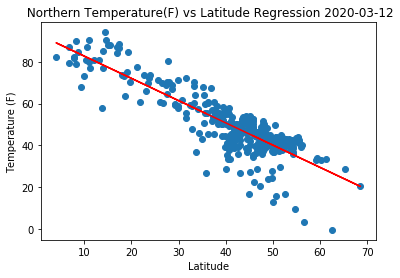

In [241]:
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f' Northern Temperature(F) vs Latitude Regression {date_of_analysis}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show('north')

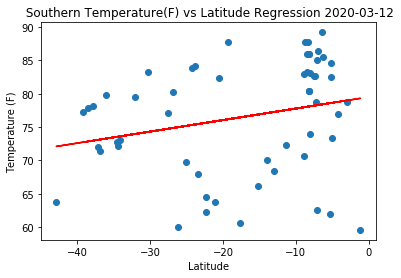

In [242]:
x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f' Southern Temperature(F) vs Latitude Regression {date_of_analysis}')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show('north')

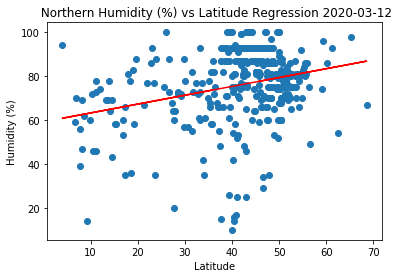

In [244]:
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f' Northern Humidity (%) vs Latitude Regression {date_of_analysis}')
plt.show('north')

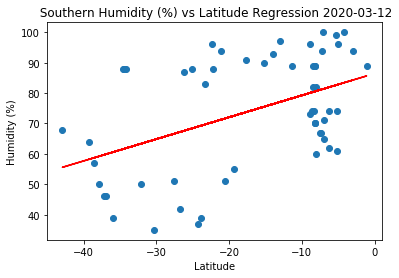

In [245]:
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f' Southern Humidity (%) vs Latitude Regression {date_of_analysis}')
plt.show('north')

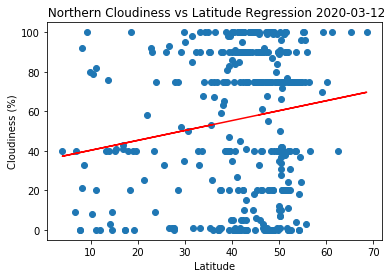

In [246]:
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f' Northern Cloudiness vs Latitude Regression {date_of_analysis}')
plt.show('north')

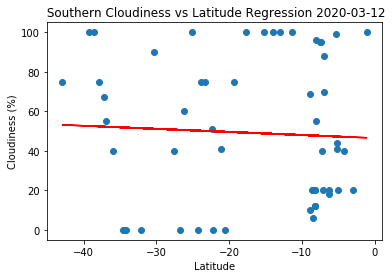

In [247]:
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f' Southern Cloudiness vs Latitude Regression {date_of_analysis}')
plt.show('north')

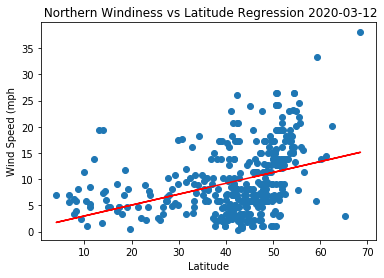

In [248]:
x_values = northern_df['Latitude']
y_values = northern_df['Windiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title(f' Northern Windiness vs Latitude Regression {date_of_analysis}')
plt.show('north')

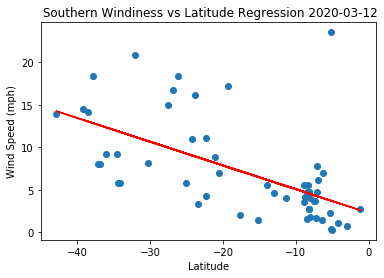

In [251]:
x_values = southern_df['Latitude']
y_values = southern_df['Windiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f' Southern Windiness vs Latitude Regression {date_of_analysis}')
plt.show('north')

In [ ]:
#saving to csv file
newdf.to_csv("./csvdata/weatherdata.csv", index=False)